The following tutorial reproduces the results of Tutorial 2 on spinw.org. It is an antiferromagnetic nearest neighbour spin chain. 

Get Packages

In [1]:
using Sunny, GLMakie, CairoMakie 

Define the lattice. Set up the lattice, the position of magnetic atoms, the symmetry inequivalent postions and the spin. The c axis is taken as the shortest axis in this tutorial as compared to spinw.org. Cu+ atoms have spin = 1 and are located at the origin of the cell. The supercell is (1,1,2). 

In [2]:
a=8.0
b=8.0
c=3.0

latvecs = lattice_vectors(a, b, c, 90, 90, 90) 
positions=[[0, 0, 0]]
types=["Cu1"]
cryst = Crystal(latvecs, positions; types)
view_crystal(cryst,10)
print_symmetry_table(cryst,8.0)
sys=System(cryst, (1,1,2),[SpinInfo(1,S=1,g=2)], :dipole, seed=0)

┌ Warning: view_crystal(cryst, max_dist) will soon be removed! Use `view_crystal(cryst)` instead. See also optional `ghost_radius` argument.
└ @ PlottingExt /Users/bhushanthipe/.julia/packages/Sunny/Kmqzx/ext/PlottingExt.jl:579


Atom 1
Type 'Cu1', position [0, 0, 0], multiplicity 1
Allowed g-tensor: [A 0 0
                   0 A 0
                   0 0 B]
Allowed anisotropy in Stevens operators:
    c₁*𝒪[2,0] +
    c₂*𝒪[4,0] + c₃*𝒪[4,4] +
    c₄*𝒪[6,0] + c₅*𝒪[6,4]

Bond(1, 1, [0, 0, 1])
Distance 3, coordination 2
Connects 'Cu1' at [0, 0, 0] to 'Cu1' at [0, 0, 1]
Allowed exchange matrix: [A 0 0
                          0 A 0
                          0 0 B]

Bond(1, 1, [0, 0, 2])
Distance 6, coordination 2
Connects 'Cu1' at [0, 0, 0] to 'Cu1' at [0, 0, 2]
Allowed exchange matrix: [A 0 0
                          0 A 0
                          0 0 B]

Bond(1, 1, [1, 0, 0])
Distance 8, coordination 4
Connects 'Cu1' at [0, 0, 0] to 'Cu1' at [1, 0, 0]
Allowed exchange matrix: [A 0 0
                          0 B 0
                          0 0 C]



System [Dipole mode]
Lattice (1×1×2)×1
Energy per site 0


Defining the spin Hamiltonian. It is a nearest neighbour only antiferromagnetic heisenberg interaction so J is positive. Set up the exchange, randomize the spins and then minimize the energy of the system to achieve the ground state.

In [3]:
J1=1

set_exchange!(sys,J1,Bond(1, 1, [0, 0, 1]))
randomize_spins!(sys)
minimize_energy!(sys)
plot_spins(sys)
energy(sys)

-2.0000000000000004

Perform Linear Spin Wave Theory calculations on the system. Create a spinw object, set up a path and calculate the dispersion bands and their intensity.

In [4]:
swt=SpinWaveTheory(sys)
η = 0.4 # (meV)
kernel = lorentzian(η)
q_points = [[0,0,0],[0,0,1]]
density = 200
path, xticks = reciprocal_space_path(cryst, q_points, density);
formula = intensity_formula(swt, :perp; kernel=delta_function_kernel)
disp, intensity = intensities_bands(swt, path, formula);

Plot the spin wave dispersion and spin-spin intensity correlation. Note that the in the spin-spin correlation graph, the log of intensity has been plotted. 

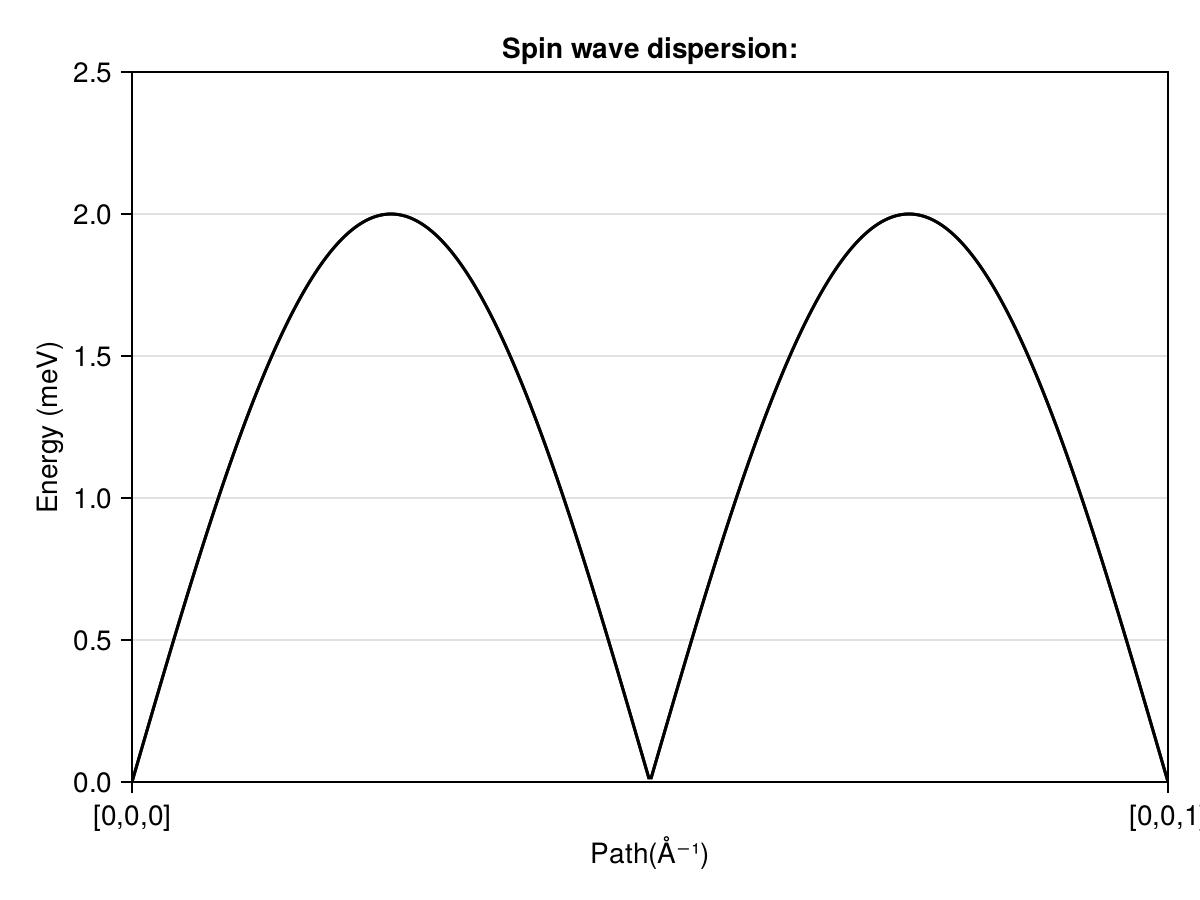

In [5]:
CairoMakie.activate!()
fig = Figure()
ax = Axis(fig[1,1]; xlabel="Path(Å⁻¹)", ylabel="Energy (meV)", title="Spin wave dispersion:", xticks)
ylims!(ax, 0.0, 2.5)
xlims!(ax, 1, size(disp, 1))
colorrange = extrema(intensity)
for i in axes(disp)[2]
    lines!(ax, 1:length(disp[:,i]), disp[:,i];color="black", colorrange)
end
fig

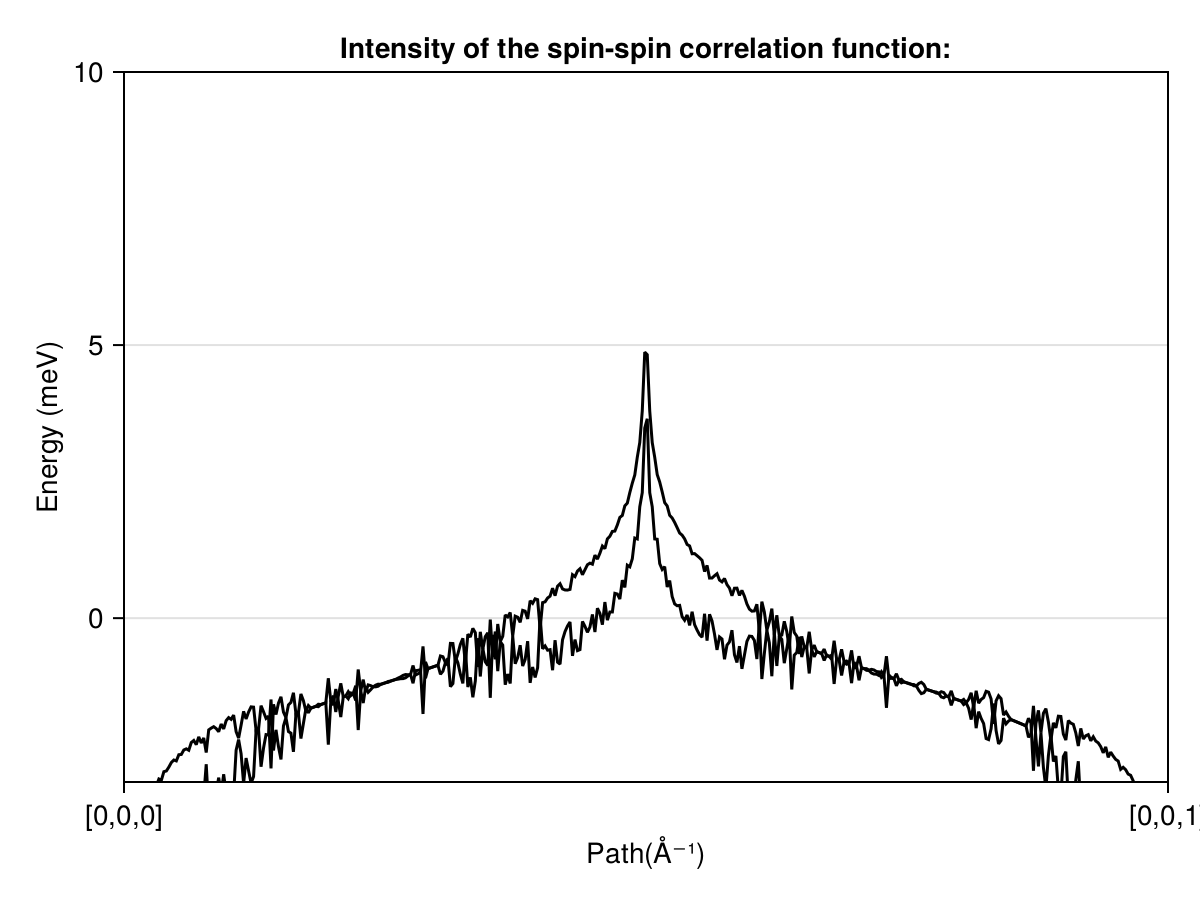

In [6]:
int=log.(intensity)
fig = Figure()
ax = Axis(fig[1,1]; xlabel="Path(Å⁻¹)", ylabel="Energy (meV)", title="Intensity of the spin-spin correlation function:", xticks)
ylims!(ax, -3, 10)
xlims!(ax, 1, size(disp, 1))
colorrange = extrema(intensity)
for i in axes(disp)[2]
    lines!(ax, 1:length(int[:,i]), int[:,i];color="black",colorrange)
end
fig